In [ ]:
 #importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

In [ ]:
#reading data
df= pd.read_csv("/content/marketing.csv")
df.head()


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


Analyzing Data


In [ ]:
df.shape

(10037, 12)

In [ ]:
df.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [ ]:
df.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [ ]:
#checking missing values
df.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [ ]:
df['date_subscribed'].nunique()

31

Filling missing values

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() <= 116:
        df[col].fillna(df[col].mode()[0], inplace=True)



In [ ]:
df.isnull().sum()

,0
user_id,0
date_served,0
marketing_channel,0
variant,0
converted,0
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,0
date_canceled,0


In [ ]:
df['date_served'].nunique()

31

In [ ]:
df['date_canceled'].nunique()

115

In [ ]:
df.isnull().sum()

In [ ]:
# Convert columns to datetime
df['date_served'] = pd.to_datetime(df['date_served'])

In [ ]:
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])

In [ ]:
df['date_canceled'] = pd.to_datetime(df['date_canceled'])

In [ ]:
df.info()

Encoding

In [ ]:
#finding unique values for deciding which encoder to use
df['converted'].unique()

array([ True, False])

In [ ]:
df['is_retained'].unique()

array([ True, False])

In [ ]:
df['variant'].unique()

array(['personalization', 'control'], dtype=object)

In [ ]:
df['language_displayed'].unique()

array(['English', 'German', 'Arabic', 'Spanish'], dtype=object)

In [ ]:
df['marketing_channel'].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email'],
      dtype=object)

In [ ]:
df['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram'],
      dtype=object)

In [ ]:
#creating function to encode categorical columns
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
df = label_encoder(df, 'converted')
df = label_encoder(df, 'is_retained')
#df = label_encoder(df, 'language_displayed')
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,1,English,English,0-18 years,2018-01-01,2018-04-02,House Ads,1
1,a100000030,2018-01-01,House Ads,personalization,1,English,English,19-24 years,2018-01-01,2018-04-02,House Ads,1
2,a100000031,2018-01-01,House Ads,personalization,1,English,English,24-30 years,2018-01-01,2018-04-02,House Ads,1
3,a100000032,2018-01-01,House Ads,personalization,1,English,English,30-36 years,2018-01-01,2018-04-02,House Ads,1
4,a100000033,2018-01-01,House Ads,personalization,1,English,English,36-45 years,2018-01-01,2018-04-02,House Ads,1


In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, ['language_displayed', 'marketing_channel', 'subscribing_channel'])
df.head()

,user_id,date_served,variant,converted,language_preferred,age_group,date_subscribed,date_canceled,is_retained,language_displayed_English,language_displayed_German,language_displayed_Spanish,marketing_channel_Facebook,marketing_channel_House Ads,marketing_channel_Instagram,marketing_channel_Push,subscribing_channel_Facebook,subscribing_channel_House Ads,subscribing_channel_Instagram,subscribing_channel_Push
0,a100000029,1/1/18,personalization,1,English,0-18 years,1/1/18,4/2/18,1,True,False,False,False,True,False,False,False,True,False,False
1,a100000030,1/1/18,personalization,1,English,19-24 years,1/1/18,4/2/18,1,True,False,False,False,True,False,False,False,True,False,False
2,a100000031,1/1/18,personalization,1,English,24-30 years,1/1/18,4/2/18,1,True,False,False,False,True,False,False,False,True,False,False
3,a100000032,1/1/18,personalization,1,English,30-36 years,1/1/18,4/2/18,1,True,False,False,False,True,False,False,False,True,False,False
4,a100000033,1/1/18,personalization,1,English,36-45 years,1/1/18,4/2/18,1,True,False,False,False,True,False,False,False,True,False,False


Conversion Rate

In [ ]:
# Calculate the number of days between served and subscribed
df['days_to_subscribe'] = (df['date_subscribed'] - df['date_served']).dt.days

# Define a conversion window
conversion_window = 30

# Determine if the subscription happened within the conversion window
df['converted_within_window'] = df['days_to_subscribe'].apply(lambda x: x is not None and x <= conversion_window)

# Calculate the conversion rate
total_served = len(df)
total_converted = df['converted_within_window'].sum()
conversion_rate = (total_converted / total_served) * 100

print(f"Total served: {total_served}")
print(f"Total converted within {conversion_window} days: {total_converted}")
print(f"Conversion rate: {conversion_rate:.2f}%")

df.head()



Total served: 10037
Total converted within 30 days: 10037
Conversion rate: 100.00%


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,days_to_subscribe,converted_within_window
0,a100000029,2018-01-01,House Ads,personalization,1,English,English,0-18 years,2018-01-01,2018-04-02,House Ads,1,0,True
1,a100000030,2018-01-01,House Ads,personalization,1,English,English,19-24 years,2018-01-01,2018-04-02,House Ads,1,0,True
2,a100000031,2018-01-01,House Ads,personalization,1,English,English,24-30 years,2018-01-01,2018-04-02,House Ads,1,0,True
3,a100000032,2018-01-01,House Ads,personalization,1,English,English,30-36 years,2018-01-01,2018-04-02,House Ads,1,0,True
4,a100000033,2018-01-01,House Ads,personalization,1,English,English,36-45 years,2018-01-01,2018-04-02,House Ads,1,0,True


Finding Convertion Rate Based on Age Group and Marketing Channel


In [ ]:
#change datetime data type to int
df['date_served'] = df['date_served'].astype(int)
df['date_subscribed'] = df['date_subscribed'].astype(int)

#calculate sum of dates using groupby and aggregate function.
segment_age = df.groupby('age_group').agg(total_exposed=('date_served', 'sum'),
    total_converted=('date_subscribed', 'sum')
    )

#find convertion rate
segment_age['conversion_rate'] = segment_age['total_converted'] / segment_age['total_exposed'] * 100

segment_age.head()


,total_exposed,total_converted,conversion_rate
age_group,,,
0-18 years,8822841912596496384,8874941112596496384,100.590504
19-24 years,4207199428081876992,4274505028081876992,101.599772
24-30 years,-2543851108532158464,-2487691108532158464,97.792324
30-36 years,6602684618239770624,6636985418239770624,100.519498
36-45 years,3577561418239770624,3607628618239770624,100.840438


Visualizing

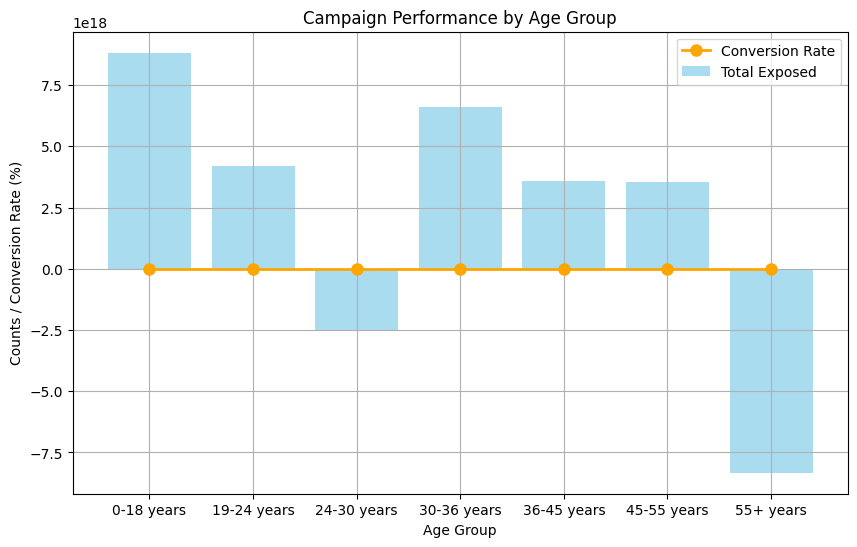

In [ ]:

plt.figure(figsize=(10, 6))

# Bar chart for total exposed
plt.bar(segment_age.index, segment_age['total_exposed'], color='skyblue', alpha=0.7, label='Total Exposed')

# Line chart for conversion rate
plt.plot(segment_age.index, segment_age['conversion_rate'], marker='o', color='orange', linestyle='-', linewidth=2, markersize=8, label='Conversion Rate')

plt.xlabel('Age Group')
plt.ylabel('Counts / Conversion Rate (%)')
plt.title('Campaign Performance by Age Group')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#change datetime data type to int
df['date_served'] = df['date_served'].astype(int)
df['date_subscribed'] = df['date_subscribed'].astype(int)

segment_age = df.groupby('marketing_channel').agg(total_exposed=('date_served', 'sum'),
    total_converted=('date_subscribed', 'sum')
    )

segment_age['conversion_rate'] = segment_age['total_converted'] / segment_age['total_exposed'] * 100

segment_age.head()

,total_exposed,total_converted,conversion_rate
marketing_channel,,,
Email,7987231809360625664,8019286209360625664,100.401321
Facebook,-2537939277561397248,-2502083277561397248,98.587200
House Ads,3614793653274869760,3831657653274869760,105.999347
Instagram,-4363828951270948864,-4313889751270948864,98.855611
Push,-7247452444183232512,-7203474844183232512,99.393199


Retension Rate

In [ ]:
# Calculate retention time in days
df['retention_days'] = (df['date_canceled'] - df['date_subscribed']).dt.days

# Define retention period
retention_period = 30

# Determine if the user was retained for the retention period
df['retained'] = df['retention_days'] >= retention_period

# Calculate retention rate
total_users = len(df)
retained_users = df['retained'].sum()
retention_rate = (retained_users / total_users) * 100

print(f"Total users: {total_users}")
print(f"Users retained for at least {retention_period} days: {retained_users}")
print(f"Retention rate: {retention_rate:.2f}%")

df.head()

Total users: 10037
Users retained for at least 30 days: 9846
Retention rate: 98.10%


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,days_to_subscribe,converted_within_window,retention_days,retained
0,a100000029,2018-01-01,House Ads,personalization,1,English,English,0-18 years,2018-01-01,2018-04-02,House Ads,1,0,True,91,True
1,a100000030,2018-01-01,House Ads,personalization,1,English,English,19-24 years,2018-01-01,2018-04-02,House Ads,1,0,True,91,True
2,a100000031,2018-01-01,House Ads,personalization,1,English,English,24-30 years,2018-01-01,2018-04-02,House Ads,1,0,True,91,True
3,a100000032,2018-01-01,House Ads,personalization,1,English,English,30-36 years,2018-01-01,2018-04-02,House Ads,1,0,True,91,True
4,a100000033,2018-01-01,House Ads,personalization,1,English,English,36-45 years,2018-01-01,2018-04-02,House Ads,1,0,True,91,True


Retention Rate Based on Age Group and Marketing Channel




In [ ]:
#converting datetime to int
df['date_canceled'] = df['date_canceled'].astype(int)
df['date_subscribed'] = df['date_subscribed'].astype(int)

#grouping based on age group
segment_age = df.groupby('age_group').agg(total_exposed=('date_canceled', 'sum'),
    total_converted=('date_subscribed', 'sum')
    )

segment_age['retention_rate'] = segment_age['total_converted'] / segment_age['total_exposed'] * 100

segment_age.head()

,total_exposed,total_converted,retention_rate
age_group,,,
0-18 years,256888238886944768,8874941112596496384,3454.786856
19-24 years,-3375954245627674624,4274505028081876992,-126.616201
24-30 years,7513540891467841536,-2487691108532158464,-33.109437
30-36 years,-2984603455469780992,6636985418239770624,-222.374112
36-45 years,-6039102655469780992,3607628618239770624,-59.737826


Visualizing Retention Rate


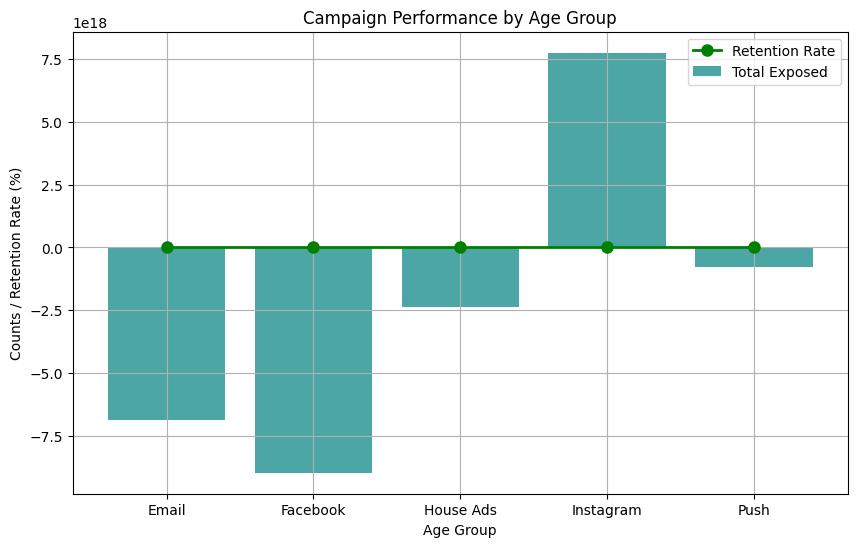

In [ ]:
plt.figure(figsize=(10, 6))

# Bar chart for total exposed
plt.bar(segment_age.index, segment_age['total_exposed'], color='teal', alpha=0.7, label='Total Exposed')

# Line chart for conversion rate
plt.plot(segment_age.index, segment_age['retention_rate'], marker='o', color='green', linestyle='-', linewidth=2, markersize=8, label='Retention Rate')

plt.xlabel('Age Group')
plt.ylabel('Counts / Retention Rate (%)')
plt.title('Campaign Performance by Age Group')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#converting datetime to int
df['date_canceled'] = df['date_canceled'].astype(int)
df['date_subscribed'] = df['date_subscribed'].astype(int)

#grouping based on age group
segment_age = df.groupby('marketing_channel').agg(total_exposed=('date_canceled', 'sum'),
    total_converted=('date_subscribed', 'sum')
    )

segment_age['retention_rate'] = segment_age['total_converted'] / segment_age['total_exposed'] * 100

segment_age.head()

,total_exposed,total_converted,retention_rate
marketing_channel,,,
Email,-6846869064348925952,8019286209360625664,-117.123405
Facebook,-8961259351270948864,-2502083277561397248,27.921112
House Ads,-2367020894144233472,3831657653274869760,-161.876799
Instagram,7747291048729051136,-4313889751270948864,-55.682557
Push,-770994844183232512,-7203474844183232512,934.309081


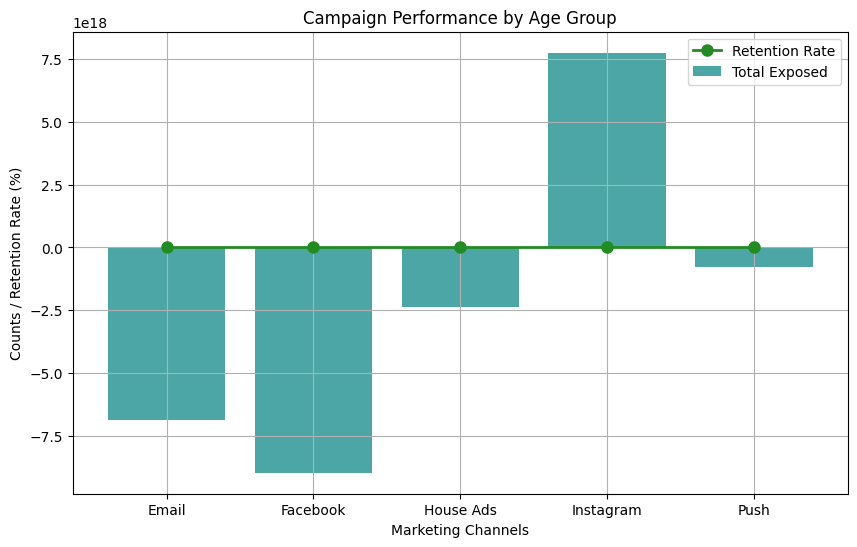

In [ ]:
plt.figure(figsize=(10, 6))

# Bar chart for total exposed
plt.bar(segment_age.index, segment_age['total_exposed'], color='teal', alpha=0.7, label='Total Exposed')

# Line chart for conversion rate
plt.plot(segment_age.index, segment_age['retention_rate'], marker='o', color='forestgreen', linestyle='-', linewidth=2, markersize=8, label='Retention Rate')

plt.xlabel('Marketing Channels')
plt.ylabel('Counts / Retention Rate (%)')
plt.title('Campaign Performance by Age Group')
plt.legend()
plt.grid(True)
plt.show()

A/B Testing

In [ ]:
# Convert 'converted' and 'is_retained' to int
df['converted'] = df['converted'].astype(int)
df['is_retained'] = df['is_retained'].astype(int)


# Define the A/B groups
group_a = df[df['variant'] == 'personalization']
group_b = df[df['variant'] == 'control']


# Calculate conversion rate for each group
conversion_rate_a = group_a['converted'].mean()
conversion_rate_b = group_b['converted'].mean()

# Calculate retention rate for each group
retention_rate_a = group_a['is_retained'].mean()
retention_rate_b = group_b['is_retained'].mean()

# Perform a t-test to compare the conversion rates
t_stat_conversion, p_val_conversion = stats.ttest_ind(group_a['converted'], group_b['converted'])

# Perform a t-test to compare the retention rates
t_stat_retention, p_val_retention = stats.ttest_ind(group_a['is_retained'], group_b['is_retained'])

# Print the results
print(f'Conversion Rate A: {conversion_rate_a:.2%}')
print(f'Conversion Rate B: {conversion_rate_b:.2%}')
print(f'T-statistic (Conversion Rate): {t_stat_conversion:.4f}')
print(f'P-value (Conversion Rate): {p_val_conversion:.4f}')

print(f'Retention Rate A: {retention_rate_a:.2%}')
print(f'Retention Rate B: {retention_rate_b:.2%}')
print(f'T-statistic (Retention Rate): {t_stat_retention:.4f}')
print(f'P-value (Retention Rate): {p_val_retention:.4f}')

Conversion Rate A: 14.25%
Conversion Rate B: 7.29%
T-statistic (Conversion Rate): 11.3499
P-value (Conversion Rate): 0.0000
Retention Rate A: 93.73%
Retention Rate B: 94.76%
T-statistic (Retention Rate): -2.2019
P-value (Retention Rate): 0.0277


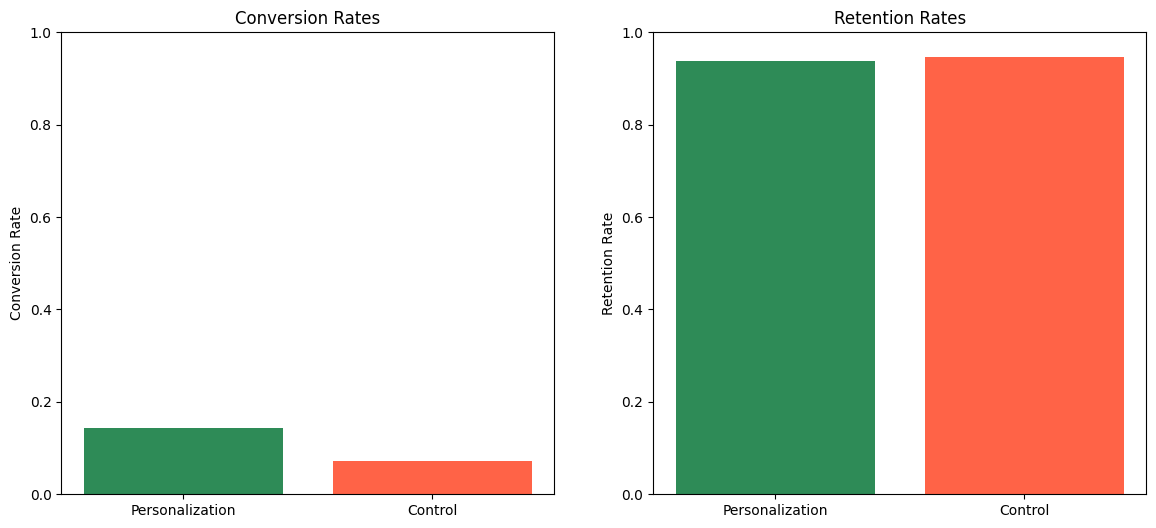

In [ ]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for conversion rate
ax[0].bar(['Personalization', 'Control'], [conversion_rate_a, conversion_rate_b], color=['seagreen', 'tomato'])
ax[0].set_title('Conversion Rates')
ax[0].set_ylabel('Conversion Rate')
ax[0].set_ylim(0, 1)

# Bar plot for retention rates
ax[1].bar(['Personalization', 'Control'], [retention_rate_a, retention_rate_b], color=['seagreen', 'tomato'])
ax[1].set_title('Retention Rates')
ax[1].set_ylabel('Retention Rate')
ax[1].set_ylim(0, 1)

#plt.tight_layout()
plt.show()